# K-Nearest Neighbors
## regression

<IPython.core.display.Javascript object>


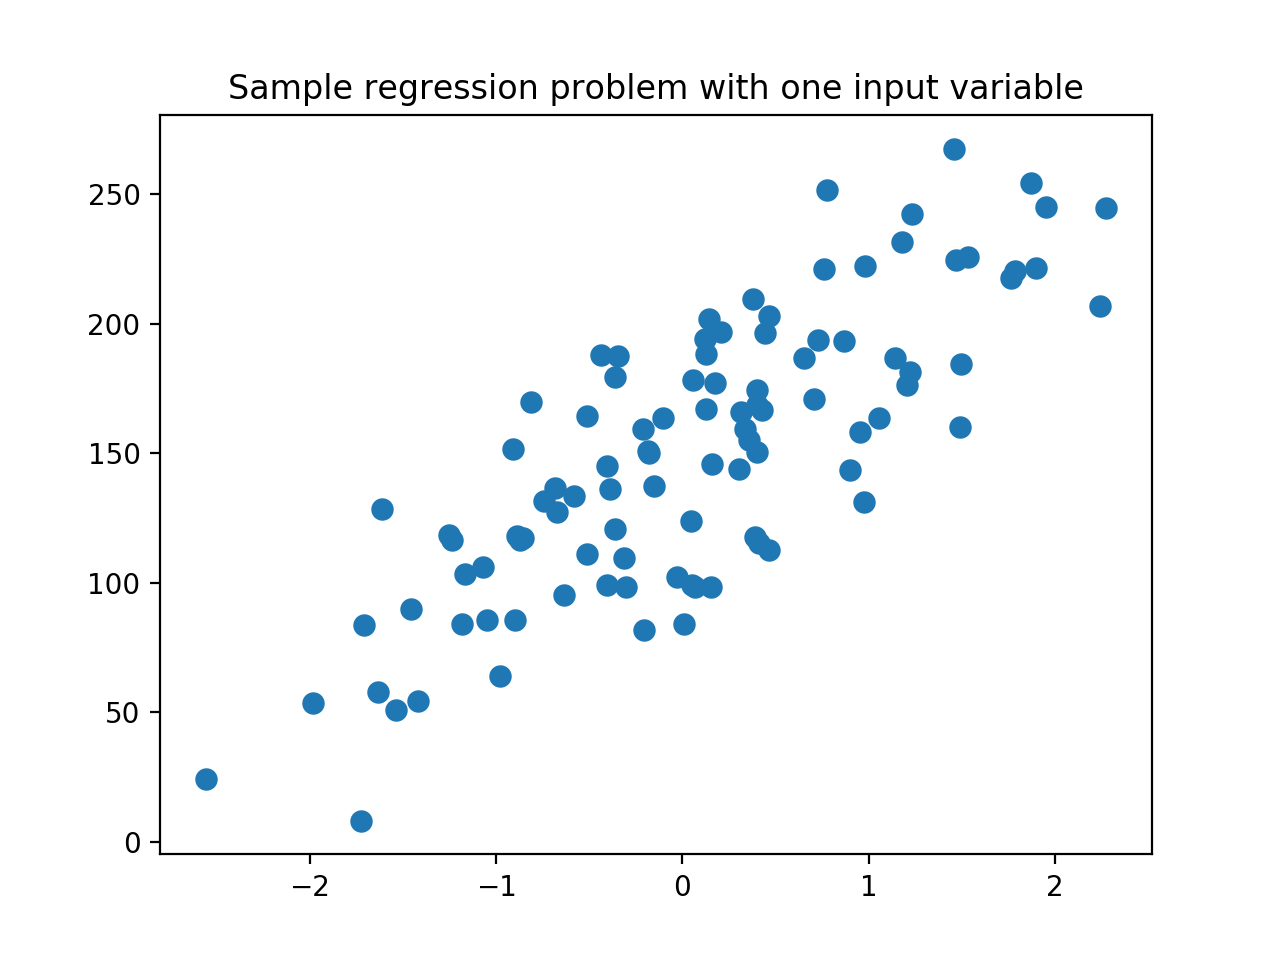

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

<IPython.core.display.Javascript object>


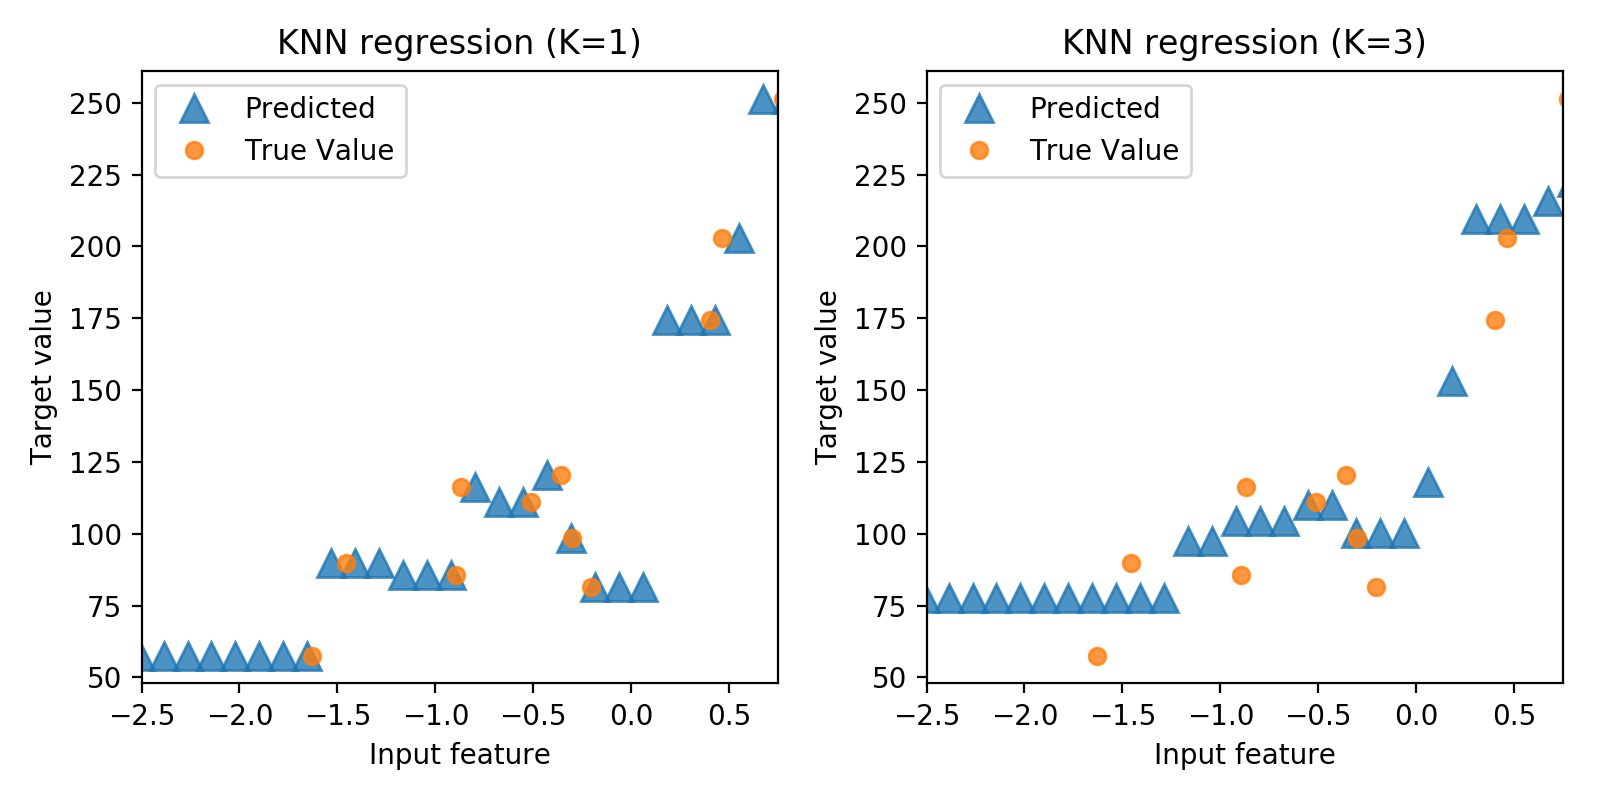

In [12]:
import numpy as np

# matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, 
# subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
# print(X_predict_input)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


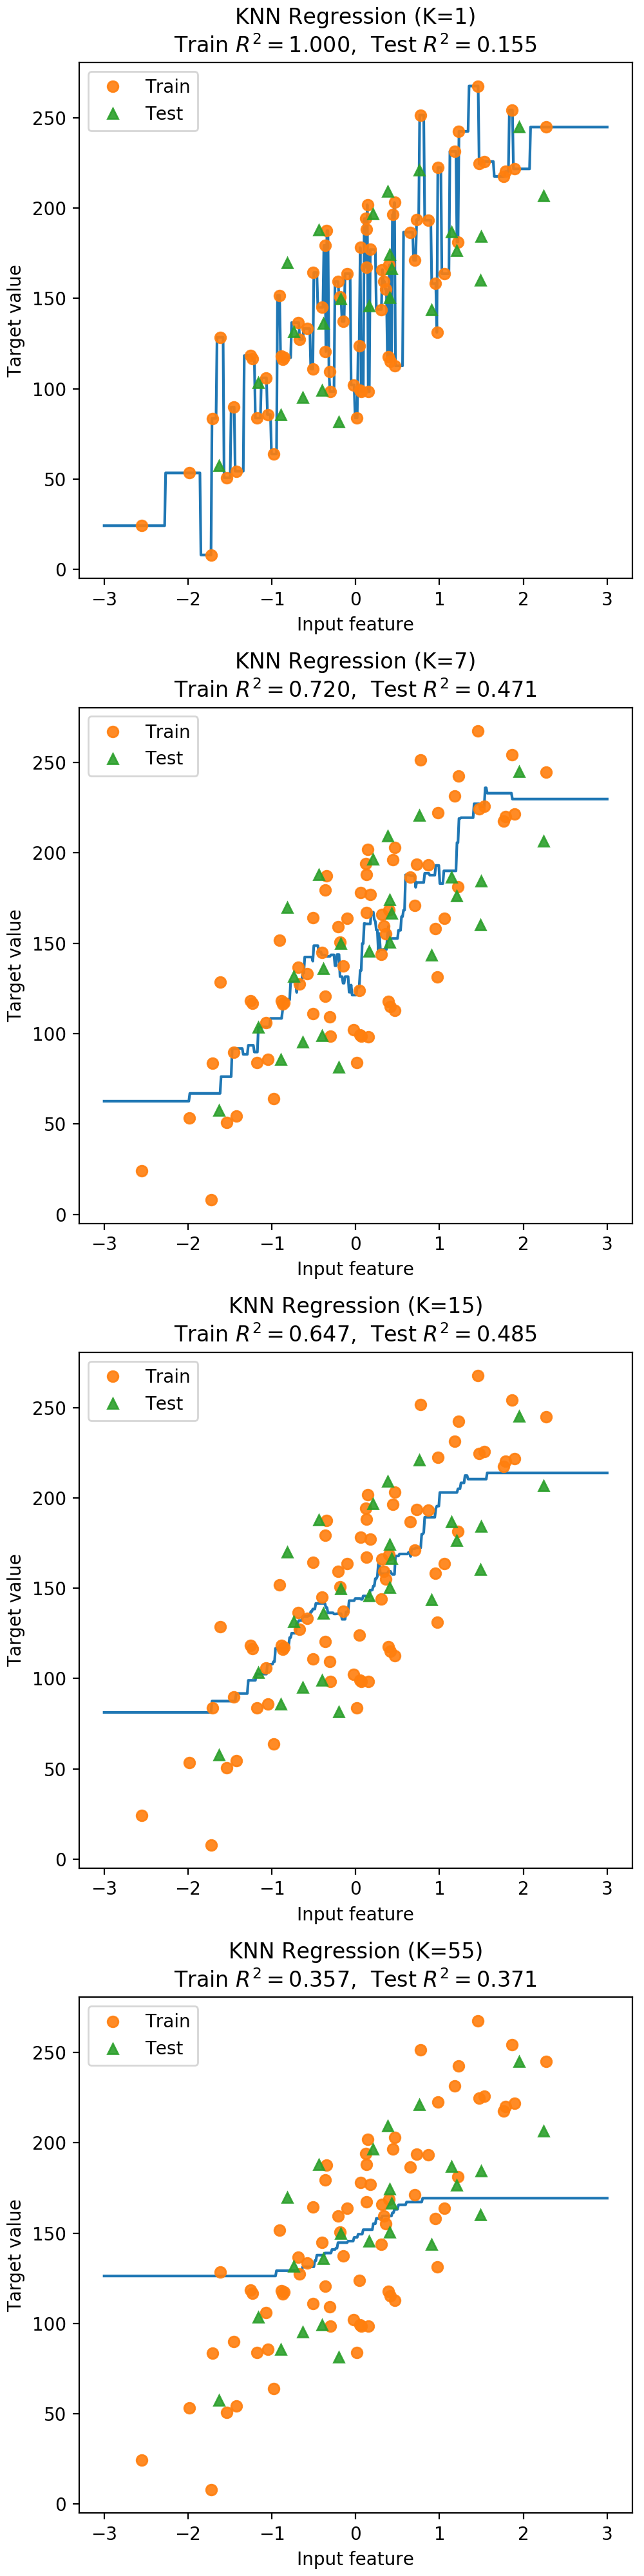

In [15]:
# plot k-NN regression on sample dataset for different values of K

# matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, 
# subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, subaxes = plt.subplots(4, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)